In [ ]:
#adding in new genes to analysis

In [1]:
import pandas as pd
from sklearn import linear_model
import numpy as np
from matplotlib import pyplot as plt
import ants
import os
from tqdm import tqdm
import statistics
import statsmodels.api as sm

In [2]:
cd ../Data/Genemaps

/mmfs1/data/pijarj/BC-ORG-Data/Data/Genemaps


In [3]:
#read in symptom patient data and slice out important columns
df = pd.read_csv('/mmfs1/data/pijarj/Data4Julianna/df_patients_S699.csv')
df.columns
df[['ados_total', 'ados_comm', 'ados_social', 'ados_rrb']]

,ados_total,ados_comm,ados_social,ados_rrb
0,18.0,6.0,12.0,2.0
1,NaN,NaN,NaN,NaN
2,13.0,4.0,9.0,NaN
3,12.0,4.0,8.0,2.0
4,16.0,5.0,11.0,3.0
...,...,...,...,...
694,NaN,NaN,NaN,NaN
695,NaN,NaN,NaN,NaN
696,13.0,4.0,9.0,2.0
697,8.0,2.0,6.0,2.0


In [4]:
#load in cmat data
atlas = ants.image_read('../../YeoAtlas/Atlas_parc-7n_2mm.nii')
diffmat = np.load('/mmfs1/data/pijarj/Data4Julianna/recon_asd_mu.npz')
diffmat = diffmat['data']
diffmat.shape

(699, 51, 51)

In [5]:
genemaps = [file for file in os.listdir() if file.endswith('.nii.gz')]
genemaps.sort()

In [6]:
nsubjects = 699
ngenes = len(genemaps)
print(nsubjects)
print(ngenes)

gene_fmri_corr = np.zeros((ngenes,nsubjects))
gene_fmri_corr

699
8


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [7]:
for g in tqdm(range(ngenes)):
    gene_im = ants.image_read(genemaps[g])
    gene_flat = gene_im.numpy().flatten()
    atlas_flat = atlas.numpy().flatten()
    roi_expression = np.array([gene_flat[atlas_flat==roi].mean() for roi in np.arange(1,52)])
    gene_sim = np.zeros((51,51))
    for i in range(51):
        for j in range(51):
            gene_sim[i,j] = abs(roi_expression[i]-roi_expression[j])

    triu = np.triu_indices(51,k=1)
    gene_vec = gene_sim[triu]

    for s in range(nsubjects):
        subject_diffmat = diffmat[s,:,:] # correlation matrices for one subject
        fmri_vec = subject_diffmat[triu]
        data = np.corrcoef(gene_vec,fmri_vec)[0,1]
        gene_fmri_corr[g,s] = data

100%|██████████| 8/8 [00:01<00:00,  6.63it/s]


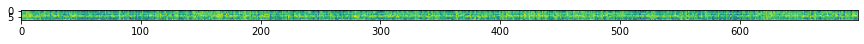

In [8]:
plt.figure(figsize=(15,10))
plt.imshow(gene_fmri_corr)

In [9]:
gene_fmri_corr.shape

(8, 699)

In [10]:
col_id = 0
Y_total = df[['ados_total', 'ados_comm', 'ados_social', 'ados_rrb']].values
column_total = (['ados_total', 'ados_comm', 'ados_social', 'ados_rrb'][col_id])
good_subjects_total = ~np.isnan(Y_total)[:,col_id]
Y_use_total = Y_total[good_subjects_total,col_id] 
X_use_total = gene_fmri_corr[:,good_subjects_total]
X_use_total = X_use_total.transpose()
regression_total =  linear_model.LinearRegression(normalize=True)
linear_regression_total = regression_total.fit(X_use_total,Y_use_total) 
Y_use_hat_total = linear_regression_total.predict(X_use_total)

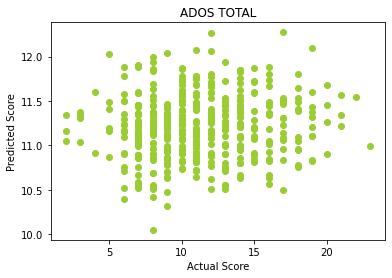

In [12]:
#scatter plot for ados_total
plt.scatter(Y_use_total,Y_use_hat_total,color='yellowgreen')
plt.title('ADOS TOTAL')
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.show()

In [13]:
col_id = 1
Y_comm = df[['ados_total', 'ados_comm', 'ados_social', 'ados_rrb']].values
column_comm = (['ados_total', 'ados_comm', 'ados_social', 'ados_rrb'][col_id])
good_subjects_comm = ~np.isnan(Y_comm)[:,col_id]
Y_use_comm = Y_comm[good_subjects_comm,col_id] 
X_use_comm = gene_fmri_corr[:,good_subjects_comm]
X_use_comm = X_use_comm.transpose()
regression_comm =  linear_model.LinearRegression(normalize=True)
linear_regression_comm = regression_comm.fit(X_use_comm,Y_use_comm) 
Y_use_hat_comm = linear_regression_comm.predict(X_use_comm)

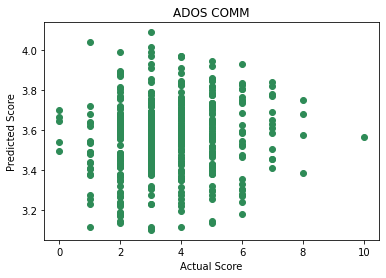

In [17]:
#scatter plot for ados_comm
plt.scatter(Y_use_comm,Y_use_hat_comm,color='seagreen')
plt.title('ADOS COMM')
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.show()

In [18]:
col_id = 2
Y_social = df[['ados_total', 'ados_comm', 'ados_social', 'ados_rrb']].values
column_social = (['ados_total', 'ados_comm', 'ados_social', 'ados_rrb'][col_id])
good_subjects_social = ~np.isnan(Y_social)[:,col_id]
Y_use_social = Y_social[good_subjects_social,col_id] 
X_use_social = gene_fmri_corr[:,good_subjects_social]
X_use_social = X_use_social.transpose()
regression_social =  linear_model.LinearRegression(normalize=True)
linear_regression_social = regression_social.fit(X_use_social,Y_use_social) 
Y_use_hat_social = linear_regression_social.predict(X_use_social)

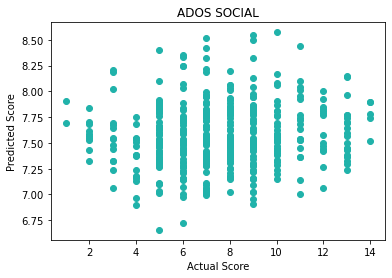

In [20]:
#scatter plot for ados_social
plt.scatter(Y_use_social,Y_use_hat_social,color='lightseagreen')
plt.title('ADOS SOCIAL')
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.show()

In [21]:
col_id = 3
Y_rrb = df[['ados_total', 'ados_comm', 'ados_social', 'ados_rrb']].values
column_rrb = (['ados_total', 'ados_comm', 'ados_social', 'ados_rrb'][col_id])
good_subjects_rrb = ~np.isnan(Y_rrb)[:,col_id]
Y_use_rrb = Y_rrb[good_subjects_rrb,col_id] 
X_use_rrb = gene_fmri_corr[:,good_subjects_rrb]
X_use_rrb = X_use_rrb.transpose()
regression_rrb =  linear_model.LinearRegression(normalize=True)
linear_regression_rrb = regression_rrb.fit(X_use_rrb,Y_use_rrb) 
Y_use_hat_rrb = linear_regression_rrb.predict(X_use_rrb)

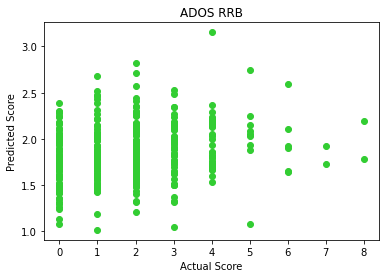

In [23]:
#scatter plot for ados_rrb
plt.scatter(Y_use_rrb,Y_use_hat_rrb,color='limegreen')
plt.title('ADOS RRB')
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.show()

In [24]:
#variance explained for ados_total
from sklearn.metrics import explained_variance_score
total = explained_variance_score(Y_use_total,Y_use_hat_total)*100
print(total)

0.8728959265440261


In [25]:
#variance explained for ados_comm
from sklearn.metrics import explained_variance_score
comm = explained_variance_score(Y_use_comm,Y_use_hat_comm)*100
print(comm)

1.4120197271464519


In [26]:
#variance explained for ados_social
from sklearn.metrics import explained_variance_score
social = explained_variance_score(Y_use_social,Y_use_hat_social)*100
print(social)

1.3473769505679911


In [27]:
#variance explained for ados_rrb
from sklearn.metrics import explained_variance_score
rrb = explained_variance_score(Y_use_rrb,Y_use_hat_rrb)*100
print(rrb)

4.088864256905767


Text(0.5, 0, 'Symptom')

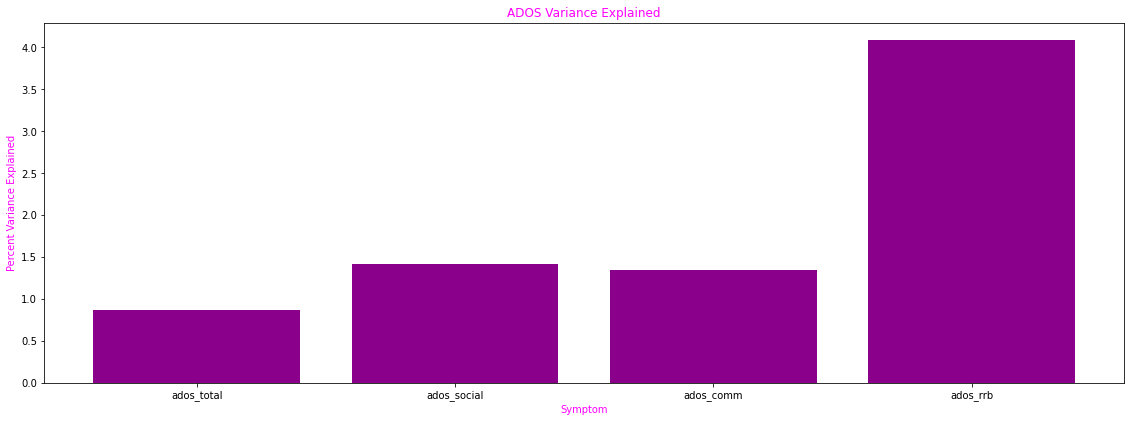

In [29]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_axes([0,0,1,1])
ados_label = ['ados_total','ados_social','ados_comm','ados_rrb']
var_explained = total, comm, social, rrb
plt.bar(ados_label,var_explained,color='darkmagenta')
plt.title('ADOS Variance Explained',color='magenta')
plt.ylabel('Percent Variance Explained',color='magenta')
plt.xlabel('Symptom',color='magenta')

In [ ]:
#variance explained of denoised vs not denoised
fig = plt.figure(figsize=(15,5))
ax = fig.add_axes([0,0,1,1])
ados_label = ['ados_total','ados_social','ados_comm','ados_rrb']
x_axis = np.arange(len(ados_label))

#not denoised is asd_mu
not_denoised = var_explained

#denoised is diffmat
denoised = [2.3310175037707492,3.539974425653303,4.331740939194462,2.0557265540216085]

#plot bar graph
plt.bar(x_axis-0.2,not_denoised,0.4,label='Not Denoised (asd_mu)',color='palegreen')
plt.bar(x_axis+0.2,denoised,0.4,label='Denoised (diffmat)',color='forestgreen')
plt.title('ADOS Variance Explained In Not Denoised vs Denoised',color='darkgreen')
plt.xticks(x_axis, ados_label,color='darkgreen')
plt.xlabel('Symptom',color='darkgreen')
plt.ylabel('Percent Variance Explained',color='darkgreen')
plt.legend()
plt.show()

In [30]:
#correlation coefficents for ados_total
coefficient_total = regression_total.coef_
labels = ['EN2','TREM2','IL6','CHD8','MECP2','SGSH','CDKL5','SYN2']
print(column_total)
print()
for i in range(0,8):
    print(f'{labels[i]},{coefficient_total[i]}')

ados_total

EN2,-0.9601075836465282
TREM2,-2.295032013733191
IL6,-2.9567893562514134
CHD8,2.7310705973817506
MECP2,2.043674555137801
SGSH,-2.313572005663297
CDKL5,-2.8587230757568936
SYN2,2.8399751155273147


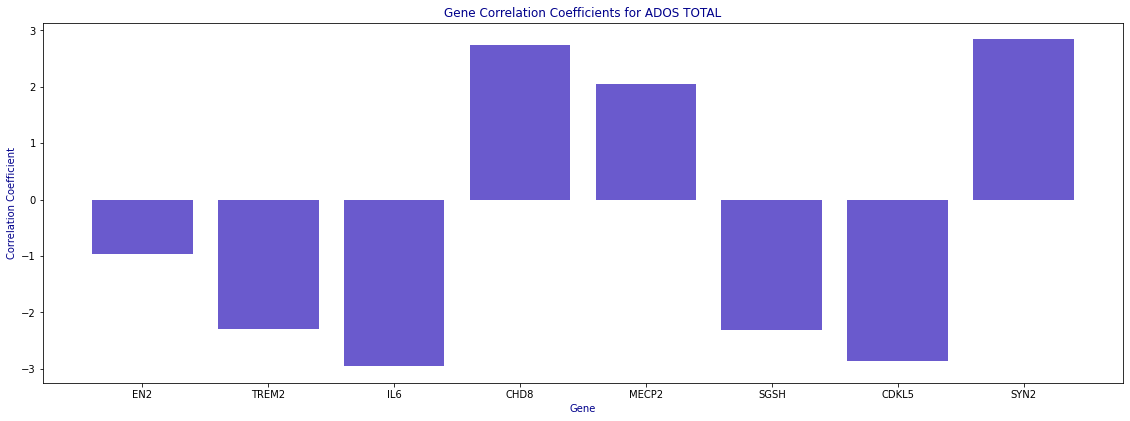

In [33]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_axes([0,0,1,1])
plt.bar(labels,coefficient_total,color='slateblue')
plt.title('Gene Correlation Coefficients for ADOS TOTAL',color='darkblue')
plt.ylabel('Correlation Coefficient',color='darkblue')
plt.xlabel('Gene',color='darkblue')
plt.show()

In [34]:
#correlation coefficents for ados_comm
coefficient_comm = regression_comm.coef_
print(column_comm)
print()
for i in range(0,8):
    print(f'{labels[i]},{coefficient_comm[i]}')

ados_comm

EN2,1.0890542315425906
TREM2,-1.4078671643341352
IL6,-2.6568926483780904
CHD8,1.949060822515126
MECP2,1.6789615356105176
SGSH,-2.3016013165038407
CDKL5,-1.237115716339588
SYN2,0.9306385350295958


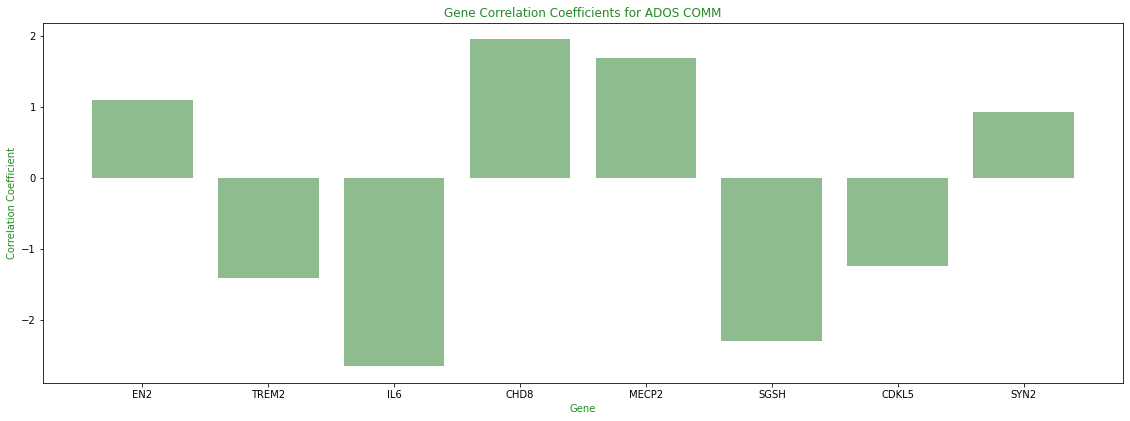

In [38]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_axes([0,0,1,1])
plt.bar(labels,coefficient_comm,color='darkseagreen')
plt.title('Gene Correlation Coefficients for ADOS COMM',color='forestgreen')
plt.ylabel('Correlation Coefficient',color='forestgreen')
plt.xlabel('Gene',color='forestgreen')
plt.show()

In [39]:
#correlation coefficents for ados_social
coefficient_social = regression_social.coef_
print(column_social)
print()
for i in range(0,8):
    print(f'{labels[i]},{coefficient_social[i]}')

ados_social

EN2,-0.5528144736759767
TREM2,-1.9037211462270192
IL6,-1.4331155123374615
CHD8,0.7794068367191302
MECP2,1.3520463073584041
SGSH,0.014574958689487365
CDKL5,-2.8538025789784602
SYN2,3.6562433338739777


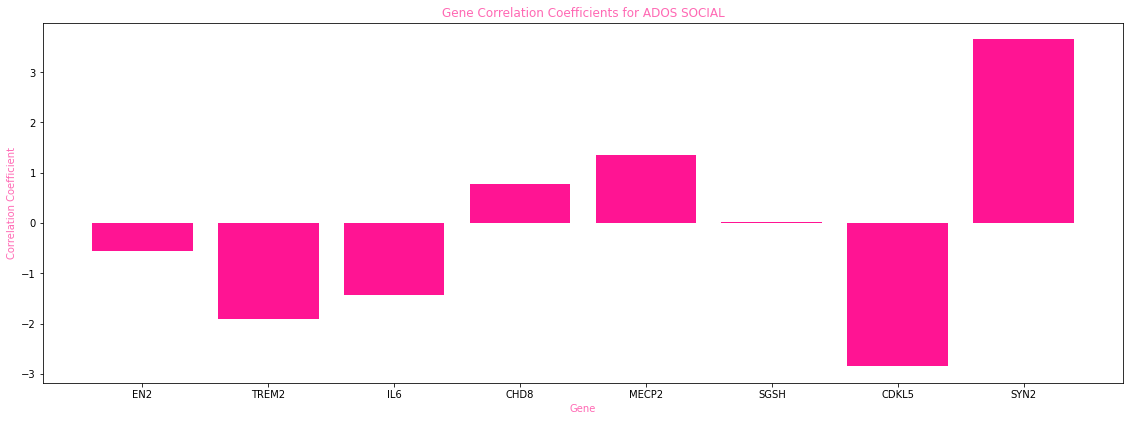

In [42]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_axes([0,0,1,1])
plt.bar(labels,coefficient_social,color='deeppink')
plt.title('Gene Correlation Coefficients for ADOS SOCIAL',color='hotpink')
plt.ylabel('Correlation Coefficient',color='hotpink')
plt.xlabel('Gene',color='hotpink')
plt.show()

In [43]:
#correlation coefficents for ados_rrb
coefficient_rrb = regression_rrb.coef_
print(column_rrb)
print()
for i in range(0,8):
    print(f'{labels[i]},{coefficient_rrb[i]}')

ados_rrb

EN2,-3.402210432811151
TREM2,0.8073658360122954
IL6,-4.099435570019373
CHD8,1.5400546660605317
MECP2,-1.9930248037882299
SGSH,0.950063966530519
CDKL5,1.3243374443226545
SYN2,1.3929153065569726


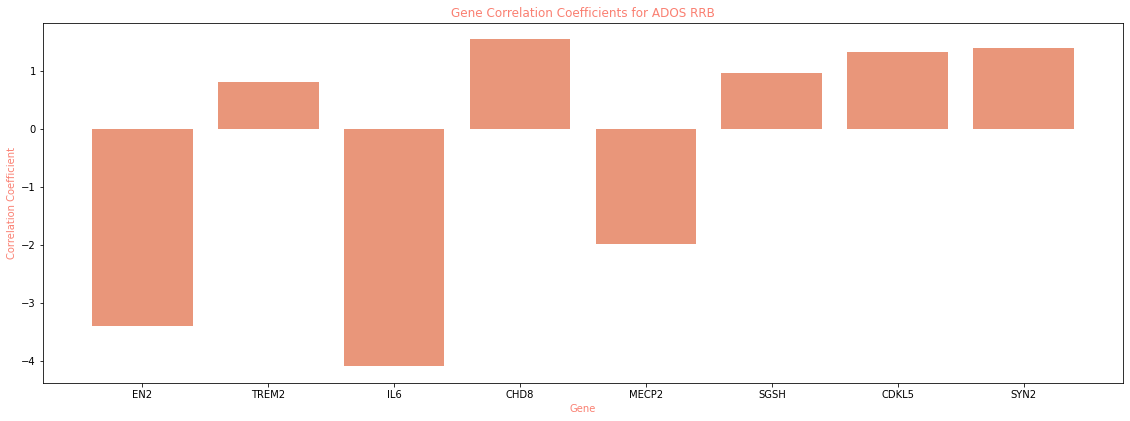

In [45]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_axes([0,0,1,1])
plt.bar(labels,coefficient_rrb,color='darksalmon')
plt.title('Gene Correlation Coefficients for ADOS RRB',color='salmon')
plt.ylabel('Correlation Coefficient',color='salmon')
plt.xlabel('Gene',color='salmon')
plt.show()

In [46]:
#significance of coefficients for ados_total
print('ADOS_TOTAL')
X_total = X_use_total.copy()
Y_total = Y_use_total.copy()
X_total = sm.add_constant(X_total)
print(X_total.shape)
print(Y_total.shape)

est_total = sm.OLS(Y_total, X_total)
est2_total = est_total.fit()
print(est2_total.summary())

ADOS_TOTAL
(429, 9)
(429,)
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.4623
Date:                Sun, 30 Oct 2022   Prob (F-statistic):              0.882
Time:                        22:09:33   Log-Likelihood:                -1187.9
No. Observations:                 429   AIC:                             2394.
Df Residuals:                     420   BIC:                             2430.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.6314    

In [95]:
def plot_errorbar_from_table(est2_total,labels):
    coef_total = est2_total.params[1::]
    ci_total = est2_total.conf_int()[1::,:]
    ci_rel_total = abs(np.vstack((coef_total,coef_total)).transpose() - ci_total)
    ci_rel_total = ci_rel_total.transpose()
    xs_total = np.arange(len(coef_total))

    plt.figure(figsize=(15,5))
    plt.bar(xs_total,coef_total,color='tan')
    plt.errorbar(xs_total,coef_total,ci_rel_total,fmt='r ',capsize=10,ecolor='saddlebrown')
    plt.xticks(xs_total,labels=labels);

Text(0.5, 0, 'Gene')

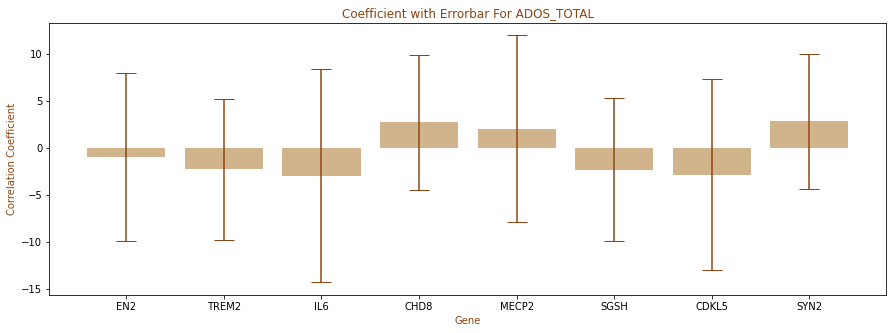

In [96]:
plot_errorbar_from_table(est2_total,labels)
plt.title('Coefficient with Errorbar For ADOS_TOTAL',color='saddlebrown')
plt.ylabel('Correlation Coefficient',color='saddlebrown')
plt.xlabel('Gene',color='saddlebrown')

In [66]:
#significance of coefficients for ados_comm
print('ADOS_COMM')
X_comm = X_use_comm.copy()
Y_comm = Y_use_comm.copy()
X_comm = sm.add_constant(X_comm)

est_comm = sm.OLS(Y_comm, X_comm)
est2_comm = est_comm.fit()
print(est2_comm.summary())

ADOS_COMM
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.7197
Date:                Sun, 30 Oct 2022   Prob (F-statistic):              0.674
Time:                        22:11:12   Log-Likelihood:                -771.69
No. Observations:                 411   AIC:                             1561.
Df Residuals:                     402   BIC:                             1598.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4302      0.217     15.80

In [77]:
def plot_errorbar_from_table(est2_comm,labels):
    coef_comm = est2_comm.params[1::]
    ci_comm = est2_comm.conf_int()[1::,:]
    ci_rel_comm = abs(np.vstack((coef_comm,coef_comm)).transpose() - ci_comm)
    ci_rel_comm = ci_rel_comm.transpose()
    xs_comm = np.arange(len(coef_comm))

    plt.figure(figsize=(15,5))
    plt.bar(xs_comm,coef_comm,color='silver')
    plt.errorbar(xs_comm,coef_comm,ci_rel_comm,fmt='r ',capsize=10,ecolor='dimgrey')
    plt.xticks(xs_comm,labels=labels);

Text(0.5, 0, 'Gene')

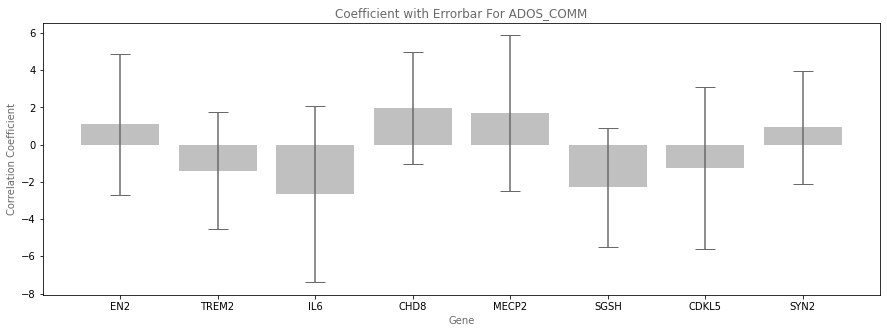

In [78]:
plot_errorbar_from_table(est2_comm,labels)
plt.title('Coefficient with Errorbar For ADOS_COMM',color='dimgrey')
plt.ylabel('Correlation Coefficient',color='dimgrey')
plt.xlabel('Gene',color='dimgrey')

In [79]:
#significance of coefficients for ados_social
print('ADOS_SOCIAL')
X_social = X_use_social.copy()
Y_social = Y_use_social.copy()
X_social = sm.add_constant(X_social)

est_social = sm.OLS(Y_social, X_social)
est2_social = est_social.fit()
print(est2_social.summary())

ADOS_SOCIAL
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.6880
Date:                Sun, 30 Oct 2022   Prob (F-statistic):              0.702
Time:                        22:12:31   Log-Likelihood:                -995.47
No. Observations:                 412   AIC:                             2009.
Df Residuals:                     403   BIC:                             2045.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.1627      0.371     19.

In [84]:
def plot_errorbar_from_table(est2_social,labels):
    coef_social = est2_social.params[1::]
    ci_social = est2_social.conf_int()[1::,:]
    ci_rel_social = abs(np.vstack((coef_social,coef_social)).transpose() - ci_social)
    ci_rel_social = ci_rel_social.transpose()
    xs_social = np.arange(len(coef_social))

    plt.figure(figsize=(15,5))
    plt.bar(xs_social,coef_social,color='powderblue')
    plt.errorbar(xs_social,coef_social,ci_rel_social,fmt='r ',capsize=10,ecolor='midnightblue')
    plt.xticks(xs_social,labels=labels);

Text(0.5, 0, 'Gene')

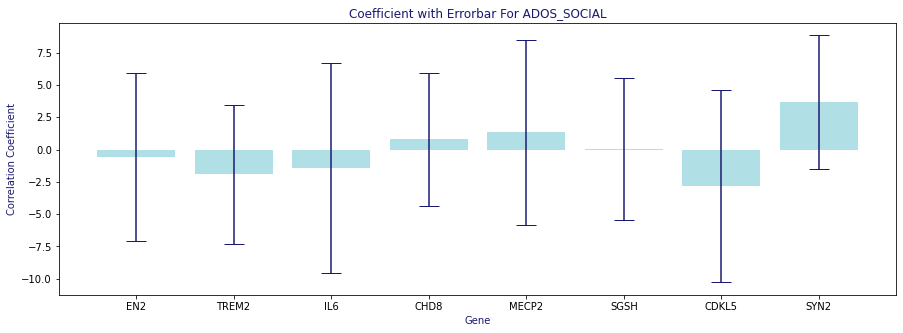

In [86]:
plot_errorbar_from_table(est2_social,labels)
plt.title('Coefficient with Errorbar For ADOS_SOCIAL',color='midnightblue')
plt.ylabel('Correlation Coefficient',color='midnightblue')
plt.xlabel('Gene',color='midnightblue')

In [87]:
#significance of coefficients for ados_rrb
print('ADOS_RRB')
X_rrb = X_use_rrb.copy()
Y_rrb = Y_use_rrb.copy()
X_rrb = sm.add_constant(X_rrb)

est_rrb = sm.OLS(Y_rrb, X_rrb)
est2_rrb = est_rrb.fit()
print(est2_rrb.summary())

ADOS_RRB
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     1.950
Date:                Sun, 30 Oct 2022   Prob (F-statistic):             0.0517
Time:                        22:13:16   Log-Likelihood:                -683.43
No. Observations:                 375   AIC:                             1385.
Df Residuals:                     366   BIC:                             1420.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6346      0.215      7.616

In [92]:
def plot_errorbar_from_table(est2_rrb,labels):
    coef_rrb = est2_rrb.params[1::]
    ci_rrb = est2_rrb.conf_int()[1::,:]
    ci_rel_rrb = abs(np.vstack((coef_rrb,coef_rrb)).transpose() - ci_rrb)
    ci_rel_rrb = ci_rel_rrb.transpose()
    xs_rrb = np.arange(len(coef_rrb))

    plt.figure(figsize=(15,5))
    plt.bar(xs_rrb,coef_rrb,color='darkseagreen')
    plt.errorbar(xs_rrb,coef_rrb,ci_rel_rrb,fmt='r ',capsize=10,ecolor='darkgreen')
    plt.xticks(xs_rrb,labels=labels);

Text(0.5, 0, 'Gene')

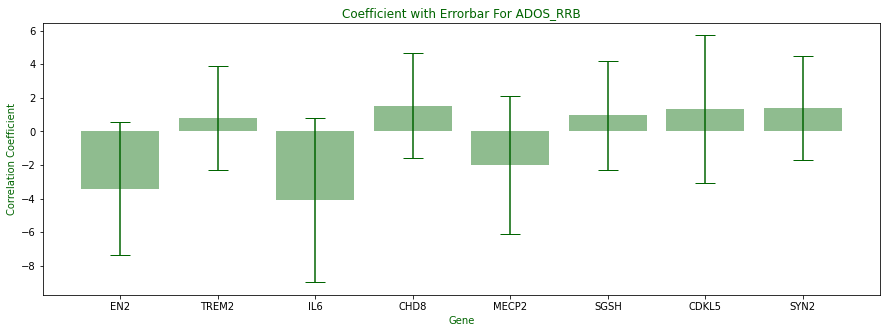

In [94]:
plot_errorbar_from_table(est2_rrb,labels)
plt.title('Coefficient with Errorbar For ADOS_RRB',color='darkgreen')
plt.ylabel('Correlation Coefficient',color='darkgreen')
plt.xlabel('Gene',color='darkgreen')